<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#회귀-트리" data-toc-modified-id="회귀-트리-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>회귀 트리</a></span></li></ul></div>

### 회귀 트리
- 회귀 함수를 기반으로 하지 않고 결정 트리와 같이 트리를 기반으로 하는 회귀 방식
- 회귀를 위한 트리를 생성하고 이를 기반으로 회귀 예측
- 리프 노드에서 예측 결정 값을 만드는 과정에서 분류 트리가 특정 클래스 레이블을 결정하는 것과 달리 회귀 트리는 리프 노드에 속한 데이터 값의 평균값을 구해 회귀 예측값을 계산
- 결정트리, 랜덤 포레스트, GBM, XGBOOST, LIGHTGBM 등 트리 기반의 알고리즘은 분류뿐만 아니라 회귀도 가능한데 트리 생성이 CART(Classification And Regression Trees)에 기반하고 있기 때문이며 CART는 분류뿐만 아니라 회귀도 가능하게 해주는 트리 생성 알고리즘임

In [11]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

boston = load_boston()
boston_df = pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df['PRICE']=boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [35]:
y_target=boston_df['PRICE']
X_data=boston_df.drop('PRICE',axis=1)

rf=RandomForestRegressor(random_state=0,n_estimators=1000)
neg_mse_scores = cross_val_score(rf,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

print('5교차 검증의 개별 MSE 점수',neg_mse_scores)
print('5교차 검증의 개별 RMSE 점수',rmse_scores)
print('5교차 검증의 평균 RMSE 점수',avg_rmse)

5교차 검증의 개별 MSE 점수 [ -7.88289687 -13.14313491 -20.57389346 -46.22586666 -18.87809457]
5교차 검증의 개별 RMSE 점수 [2.80764971 3.62534618 4.5358454  6.7989607  4.34489293]
5교차 검증의 평균 RMSE 점수 4.422538982804892


In [32]:
# 교차 검증 사용자 함수 작성하여 XGBRegrssor 클래스를 작성
def get_model_cv_prediction(model,X_data,y_target):
    neg_mse_scores = cross_val_score(model,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('5교차 검증의 개별 MSE 점수',neg_mse_scores)
    print('5교차 검증의 개별 RMSE 점수',rmse_scores)
    print('5교차 검증의 평균 RMSE 점수',avg_rmse)

In [33]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor

xgb = XGBRegressor(n_estimators=1000,subsample=0.5)
lgbm = LGBMRegressor(n_estimators=1000,subsample=0.5)
dt = DecisionTreeRegressor(max_depth=3)
print('XGBRegressor')
get_model_cv_prediction(xgb,X_data,y_target)
print('LGBMRegressor')
get_model_cv_prediction(lgbm,X_data,y_target)
print('DecisionTreeRegressor')
get_model_cv_prediction(dt,X_data,y_target)

XGBRegressor
5교차 검증의 개별 MSE 점수 [-11.37469984 -22.73325751 -24.0141192  -46.65485199 -17.63557786]
5교차 검증의 개별 RMSE 점수 [3.37263989 4.76794059 4.90042031 6.83043571 4.19947352]
5교차 검증의 평균 RMSE 점수 4.814182005020529
LGBMRegressor
5교차 검증의 개별 MSE 점수 [ -8.95912057 -18.57739307 -17.05372117 -43.70832859 -26.91570038]
5교차 검증의 개별 RMSE 점수 [2.99317901 4.31015001 4.12961514 6.61122747 5.18803435]
5교차 검증의 평균 RMSE 점수 4.646441191925675
DecisionTreeRegressor
5교차 검증의 개별 MSE 점수 [-18.59356411 -22.49318525 -42.33056138 -53.32685794 -42.81135374]
5교차 검증의 개별 RMSE 점수 [4.31202552 4.7426981  6.50619408 7.30252408 6.54303857]
5교차 검증의 평균 RMSE 점수 5.881296070029331


<AxesSubplot:>

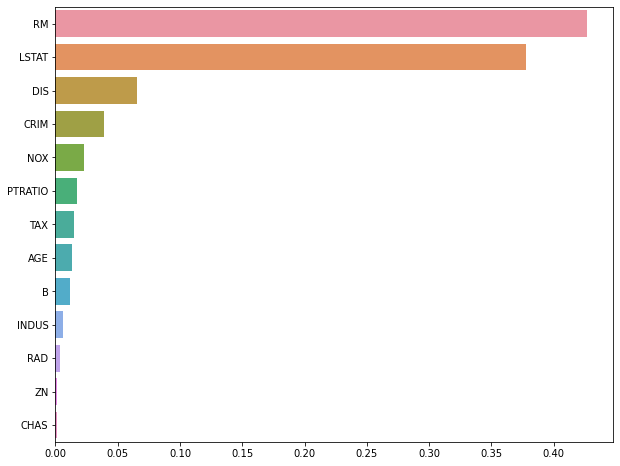

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
rf=RandomForestRegressor(random_state=0,n_estimators=1000)
rf.fit(X_data,y_target)
feature_series=pd.Series(data=rf.feature_importances_,index=X_data.columns)
feature_series=feature_series.sort_values(ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(x=feature_series,y=feature_series.index)

        RM  PRICE
329  6.333   22.6
371  6.216   50.0
219  6.373   23.0
403  5.349    8.3
78   6.232   21.2
..     ...    ...
246  6.108   24.3
374  4.138   13.8
56   6.383   24.7
455  6.525   14.1
60   5.741   18.7

[100 rows x 2 columns]


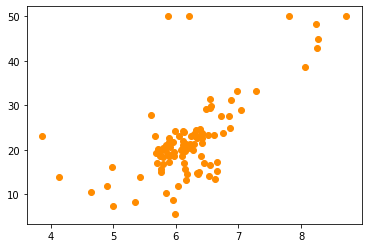

In [44]:
boston_sample=boston_df[['RM','PRICE']]
boston_sample=boston_sample.sample(n=100,random_state=0)
print(boston_sample)
plt.scatter(boston_sample.RM,boston_sample.PRICE,c='darkorange')

In [52]:
from sklearn.linear_model import LinearRegression

lr_reg=LinearRegression()
dt_reg2=DecisionTreeRegressor(max_depth=2)
dt_reg7=DecisionTreeRegressor(max_depth=7)

X_test = np.arange(4.5,8.5,0.04).reshape(-1,1)

X_feature = boston_sample['RM'].values.reshape(-1,1)
y_target = boston_sample['PRICE'].values.reshape(-1,1)

lr_reg.fit(X_feature,y_target)
dt_reg2.fit(X_feature,y_target)
dt_reg7.fit(X_feature,y_target)

pred_lr=lr_reg.predict(X_test)
pred_dt2=dt_reg2.predict(X_test)
pred_dt7=dt_reg7.predict(X_test)

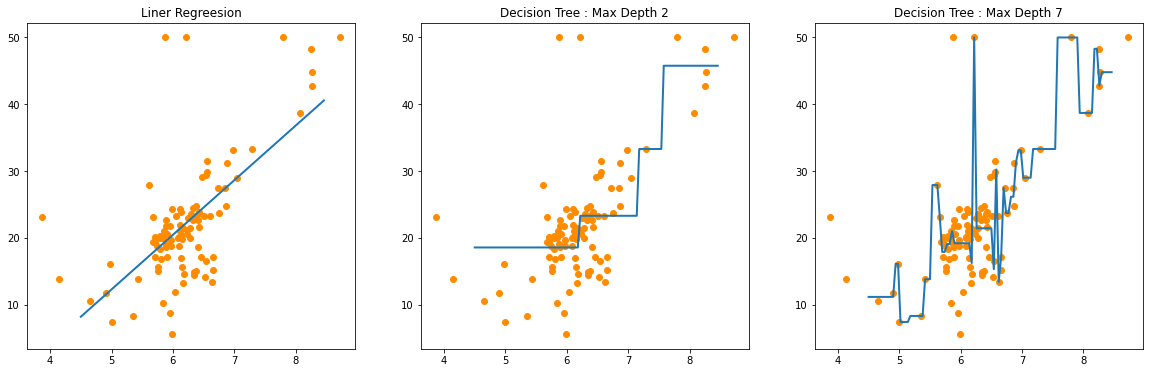

In [55]:
fig,(ax1,ax2,ax3)=plt.subplots(figsize=(20,6),ncols=3)

ax1.set_title('Liner Regreesion')
ax1.scatter( boston_sample['RM'], boston_sample['PRICE'],c='darkorange')
ax1.plot(X_test,pred_lr,label='linear',linewidth=2)

ax2.set_title('Decision Tree : Max Depth 2')
ax2.scatter( boston_sample['RM'], boston_sample['PRICE'],c='darkorange')
ax2.plot(X_test,pred_dt2,label='Max Depth 2',linewidth=2)

ax3.set_title('Decision Tree : Max Depth 7')
ax3.scatter( boston_sample['RM'], boston_sample['PRICE'],c='darkorange')
ax3.plot(X_test,pred_dt7,label='Max Depth 7',linewidth=2)